In [1]:
import joblib
(A,terms,snippets) = joblib.load( "articles-raw.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 21879 X 2741 document-term matrix


In [2]:
from sklearn.decomposition import LatentDirichletAllocation
k=15
model = LatentDirichletAllocation(n_components=k, max_iter=50, learning_method='batch', learning_offset=50.,random_state=0).fit(A)
W = model.fit_transform( A )
H = model.components_

In [3]:
W.shape

(21879, 15)

In [4]:
H.shape

(15, 2741)

In [5]:
import numpy as np
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [6]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: ukraine, war, weapons, media, syria, russia, sanctions, ww, eu, vietnam
Topic 02: palestine, israel, palestinian, today, shireenabuakleh, flag, jenin, freepalestine, yemen, endisraeliapartheid
Topic 03: israel, palestine, palestinians, jews, state, palestinian, land, jewish, israels, israeli
Topic 04: war, afghanistan, people, im, know, think, years, going, see, thats
Topic 05: abu, journalist, israeli, shireen, palestine, killing, killed, akleh, israels, journalists
Topic 06: palestine, israel, occupied, only, live, tweet, earthit, nnlong, loudlyfor, nncopy
Topic 07: occupation, israel, bds, freepalestine, time, held, palestine, freedom, standwiththe, freethemall
Topic 08: israel, palestine, emmettimanu, holocaust, people, pngz, solution, gomiriam, jonathanweissb, soc_justice
Topic 09: war, crimes, taliban, afghanistan, people, human, civilians, rights, syria, killed
Topic 10: conflict, israelpalestine, take, wrong, al, news, palestine, palestinian, muslims, war
Topic 11: wa

In [7]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})

In [8]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()

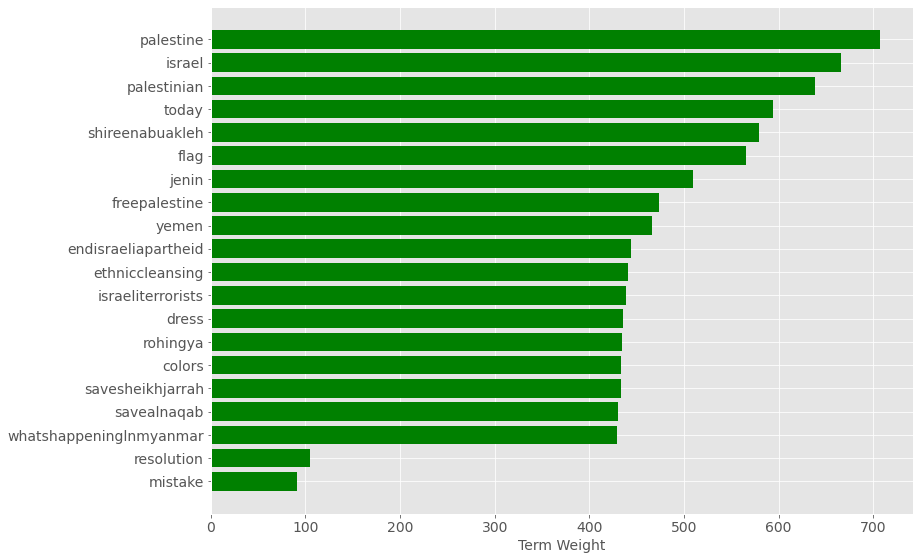

In [14]:
plot_top_term_weights( terms, H, 1, 20 )

In [10]:
def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append( all_snippets[doc_index] )
    return top_snippets

In [11]:
topic_snippets = get_top_snippets( snippets, W, 0, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. ZelenskyyUa BorisJohnson US army has not won a single war even against small countriesnBe it Vietnam
02. IntlCrimCourt US army has not won a single war even against small countriesnBe it Vietnam or Afganis
03. CBSNews US army has not won a single war even against small countriesnBe it Vietnam or Afganistan nn
04. CNN US army has not won a single war even against small countriesnBe it Vietnam or Afganistan nnKill
05. American satanismwar crimesHiroshima Nagasaki Vietnam Iraq Lybia Syria killingstarving womenchildren
06. American satanismwar crimesHiroshima Nagasaki Vietnam Iraq Lybia Syria killingstarving womenchildren
07. American satanismwar crimesHiroshima Nagasaki Vietnam Iraq Lybia Syria killingstarving womenchildren
08. American satanismwar crimesHiroshima Nagasaki Vietnam Iraq Lybia Syria killingstarving womenchildren
09. American satanismwar crimesHiroshima Nagasaki Vietnam Iraq Lybia Syria killingstarving womenchildren
10. American satanismwar crimesHiroshima Nagasaki Vietn

In [12]:
topic_snippets = get_top_snippets( snippets, W, 1, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

01. MohmedR Aidane_dxb hrw HumanRightsObs CoE_HRightsRLaw MWLOrg_Fr Today We Must Dress in the Colors of
02. Aidane_dxb MohmedR hrw HumanRightsObs CoE_HRightsRLaw MWLOrg_Fr Today We Must Dress in the Colors of
03. AminJarrar MohmedR Today We Must Dress in the Colors of the Palestinian Flag ShireenAbuAkleh FreePal
04. MohmedR MAJHOOL Today We Must Dress in the Colors of the Palestinian Flag ShireenAbuAkleh FreePalest
05. RepRashida MohmedR Today We Must Dress in the Colors of the Palestinian Flag ShireenAbuAkleh FreePal
06. StopAntisemites AlJazeera AlJazeeraWorld ajplus AJEnglish Today We Must Dress in the Colors of the P
07. What is the world hearing when Israel narratives over the murder of ShireenAbuAkleh  change from day
08. ArielElyseGold Today We Must Dress in the Colors of the Palestinian Flag ShireenAbuAkleh FreePalesti
09. ArielElyseGold Today We Must Dress in the Colors of the Palestinian Flag ShireenAbuAkleh FreePalesti
10. ArielElyseGold SummerForPA Today We Must Dress in t

In [13]:
joblib.dump((W,H,terms,snippets), "articles-model-lda-k%02d.pkl" % k) 

['articles-model-lda-k15.pkl']